In [ ]:
import pandas as pd

df = pd.read_csv("final_csv_0.csv")
df2 = df.rename({'Unnamed: 0': 'Index'}, axis=1)
df2.set_index = 'Index'
df2.columns

Index(['Index', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'B365H', 'B365D', 'B365A', 'ref_xg_home', 'ref_xg_away'],
      dtype='object')

In [ ]:
df2.head()

Index        Date           HomeTeam      AwayTeam  FTHG  FTAG  FTR  HS  \
0      0  08/08/2015        Bournemouth   Aston Villa     0     1   -1  11   
1      1  08/08/2015            Chelsea  Swansea City     2     2    0  11   
2      2  08/08/2015            Everton       Watford     2     2    0  10   
3      3  08/08/2015     Leicester City    Sunderland     4     2    1  19   
4      4  08/08/2015  Manchester United     Tottenham     1     0    1   9   

   AS  HST  ...  AF  HC  AC  HY  AY  HR  AR  B365H  B365D  B365A  
0   7    2  ...  13   6   3   3   4   0   0   2.00    3.6   4.00  
1  18    3  ...  16   4   8   1   3   1   0   1.36    5.0  11.00  
2  11    5  ...  13   8   2   1   2   0   0   1.70    3.9   5.50  
3  10    8  ...  17   6   3   2   4   0   0   1.95    3.5   4.33  
4   9    1  ...  12   1   2   2   3   0   0   1.65    4.0   6.00  

[5 rows x 22 columns]

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print((df2.describe()))

            Index        FTHG        FTAG         FTR          HS          AS  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean   189.500000    1.513158    1.305263    0.089474   13.847368   11.736842   
std    109.840794    1.326545    1.258836    0.873168    5.661784    5.348460   
min      0.000000    0.000000    0.000000   -1.000000    3.000000    1.000000   
25%     94.750000    1.000000    0.000000   -1.000000    9.000000    8.000000   
50%    189.500000    1.000000    1.000000    0.000000   13.500000   11.000000   
75%    284.250000    2.000000    2.000000    1.000000   17.000000   15.000000   
max    379.000000    7.000000    6.000000    1.000000   31.000000   31.000000   

              HST         AST          HF          AF          HC          AC  \
count  380.000000  380.000000  380.000000  380.000000  380.000000  380.000000   
mean     4.678947    4.142105   10.055263   10.157895    5.602632    4.821053   
std      2.600402    2.5899

In [ ]:


del df2["Index"]
df2["Date"] = pd.to_datetime(df2["Date"])
df2.dtypes

Date           datetime64[ns]
Time                   object
HomeTeam               object
AwayTeam               object
FTHG                    int64
FTAG                    int64
FTR                     int64
HS                      int64
AS                      int64
HST                     int64
AST                     int64
HF                      int64
AF                      int64
HC                      int64
AC                      int64
HY                      int64
AY                      int64
HR                      int64
AR                      int64
B365H                 float64
B365D                 float64
B365A                 float64
ref_xg_home           float64
ref_xg_away           float64
dtype: object

In [ ]:
df2['HomeTeam'].value_counts()


Brentford            19
Manchester United    19
Arsenal              19
Wolves               19
Southampton          19
Brighton             19
Manchester City      19
Leeds United         19
Crystal Palace       19
Aston Villa          19
Liverpool            19
Tottenham            19
Newcastle United     19
Norwich City         19
Watford              19
Leicester City       19
Everton              19
Chelsea              19
Burnley              19
West Ham             19
Name: HomeTeam, dtype: int64

In [ ]:
df2.shape

(380, 24)

In [ ]:
print(df2.isnull().sum())


Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
B365H       0
B365D       0
B365A       0
dtype: int64


In [ ]:
#del df2["Index"]
#df2
df3 = df2.groupby(["HomeTeam"])
df3.first()
df4 = df2.sort_values("HomeTeam")
df4

Date  HomeTeam        AwayTeam  FTHG  FTAG  FTR  HS  AS  HST  AST  \
105 2016-06-11   Arsenal       Tottenham     1     1    0  15  10    2    3   
80  2016-10-22   Arsenal   Middlesbrough     0     0    0   9  11    5    4   
366 2017-05-16   Arsenal      Sunderland     2     0    1  36   6   13    2   
170 2016-12-26   Arsenal       West Brom     1     0    1  26   3   11    1   
217 2017-01-22   Arsenal         Burnley     2     1    1  24  13    8    7   
..         ...       ...             ...   ...   ...  ...  ..  ..  ...  ...   
279 2017-03-18  West Ham  Leicester City     2     3   -1  20  11    7    5   
165 2016-12-17  West Ham       Hull City     1     0    1  18  16    6    5   
136 2016-03-12  West Ham         Arsenal     1     5   -1  10  19    3   10   
65  2016-01-10  West Ham   Middlesbrough     1     1    0  19   9    2    3   
159 2016-12-14  West Ham         Burnley     1     0    1  20   8    7    2   

     ...  AF  HC  AC  HY  AY  HR  AR  B365H  B365D  B365A  
105  ...  17   7   2   1   2   0   0   1.95    3.6   4.20  
80   ...  13   8   3   1   0   0   0   1.25    6.5  15.00  
366  ...  10  17   3   4   2   0   0   1.09   13.0  29.00  
170  ...   7   6   5   2   1   0   0   1.33    5.5   8.50  
217  ...  11  10   4   1   3   1   0   1.20    7.5  17.00  
..   ...  ..  ..  ..  ..  ..  ..  ..    ...    ...    ...  
279  ...  14   6   5   0   1   0   0   2.30    3.5   3.30  
165  ...   9  10   6   2   4   0   0   1.62    4.1   6.00  
136  ...  11   3   2   3   3   0   0   4.75    4.2   1.75  
65   ...  12   4   5   2   3   0   0   2.25    3.4   3.50  
159  ...  15   6   1   0   2   0   0   1.67    4.0   5.75  

[380 rows x 21 columns]

In [ ]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


column_to_move = df2.pop("FTR")

#df3 = pd.concat([df2, column_to_move], join = 'inner')
#df3
df2.insert(23, "FTR", column_to_move)
#df2.pop("Index")




In [ ]:
df2

Date   Time           HomeTeam           AwayTeam  FTHG  FTAG  HS  \
0   2021-08-13  20:00          Brentford            Arsenal     2     0   8   
1   2021-08-14  12:30  Manchester United       Leeds United     5     1  16   
2   2021-08-14  15:00            Burnley           Brighton     1     2  14   
3   2021-08-14  15:00            Chelsea     Crystal Palace     3     0  13   
4   2021-08-14  15:00            Everton        Southampton     3     1  14   
..         ...    ...                ...                ...   ...   ...  ..   
375 2022-05-22  16:00     Crystal Palace  Manchester United     1     0   6   
376 2022-05-22  16:00     Leicester City        Southampton     4     1  12   
377 2022-05-22  16:00          Liverpool             Wolves     3     1  29   
378 2022-05-22  16:00    Manchester City        Aston Villa     3     2  24   
379 2022-05-22  16:00       Norwich City          Tottenham     0     5   9   

     AS  HST  AST  ...  HY  AY  HR  AR  B365H  B365D  B365A  ref_xg_home  \
0    22    3    4  ...   0   0   0   0   4.00   3.40   1.95          1.6   
1    10    8    3  ...   1   2   0   0   1.53   4.50   5.75          2.5   
2    14    3    8  ...   2   1   0   0   3.10   3.10   2.45          1.4   
3     4    6    1  ...   0   0   0   0   1.25   5.75  13.00          0.8   
4     6    6    3  ...   2   0   0   0   1.90   3.50   4.00          2.3   
..   ..  ...  ...  ...  ..  ..  ..  ..    ...    ...    ...          ...   
375  10    3    4  ...   2   4   0   0   3.00   3.60   2.25          0.8   
376   7    6    2  ...   0   1   0   0   1.85   4.00   3.80          3.1   
377   7    8    5  ...   1   0   0   0   1.14   8.50  15.00          3.1   
378   4    5    2  ...   0   1   0   0   1.16   8.00  17.00          3.7   
379  19    0   13  ...   3   1   0   0   9.50   6.50   1.25          0.5   

     ref_xg_away  FTR  
0            1.6    1  
1            0.6    1  
2            1.4   -1  
3            0.4    1  
4            0.9    1  
..           ...  ...  
375          0.9    1  
376          1.2    1  
377          1.4    1  
378          0.3    1  
379          3.4   -1  

[380 rows x 24 columns]

In [ ]:
X = df2.iloc[:,4:23]  #independent columns
print(X)
y = df2.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=19)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(19,'Score'))

     FTHG  FTAG  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  B365H  \
0       2     0   8  22    3    4  12   8   2   5   0   0   0   0   4.00   
1       5     1  16  10    8    3  11   9   5   4   1   2   0   0   1.53   
2       1     2  14  14    3    8  10   7   7   6   2   1   0   0   3.10   
3       3     0  13   4    6    1  15  11   5   2   0   0   0   0   1.25   
4       3     1  14   6    6    3  13  15   6   8   2   0   0   0   1.90   
..    ...   ...  ..  ..  ...  ...  ..  ..  ..  ..  ..  ..  ..  ..    ...   
375     1     0   6  10    3    4  12  22   3   6   2   4   0   0   3.00   
376     4     1  12   7    6    2  10   5   3   3   0   1   0   0   1.85   
377     3     1  29   7    8    5   6   3   5   3   1   0   0   0   1.14   
378     3     2  24   4    5    2   5  11  13   1   0   1   0   0   1.16   
379     0     5   9  19    0   13  13   7   3   2   3   1   0   0   9.50   

     B365D  B365A  ref_xg_home  ref_xg_away  
0     3.40   1.95          1.6          1

[0.20871727 0.22288238 0.0294076  0.03202159 0.06102603 0.05966144
 0.02657712 0.02310951 0.02888649 0.02639335 0.02578354 0.03012859
 0.00998277 0.00778555 0.04313364 0.02563041 0.03549919 0.05084061
 0.05253291]


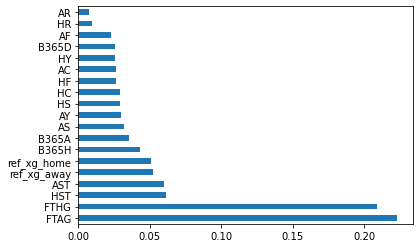

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

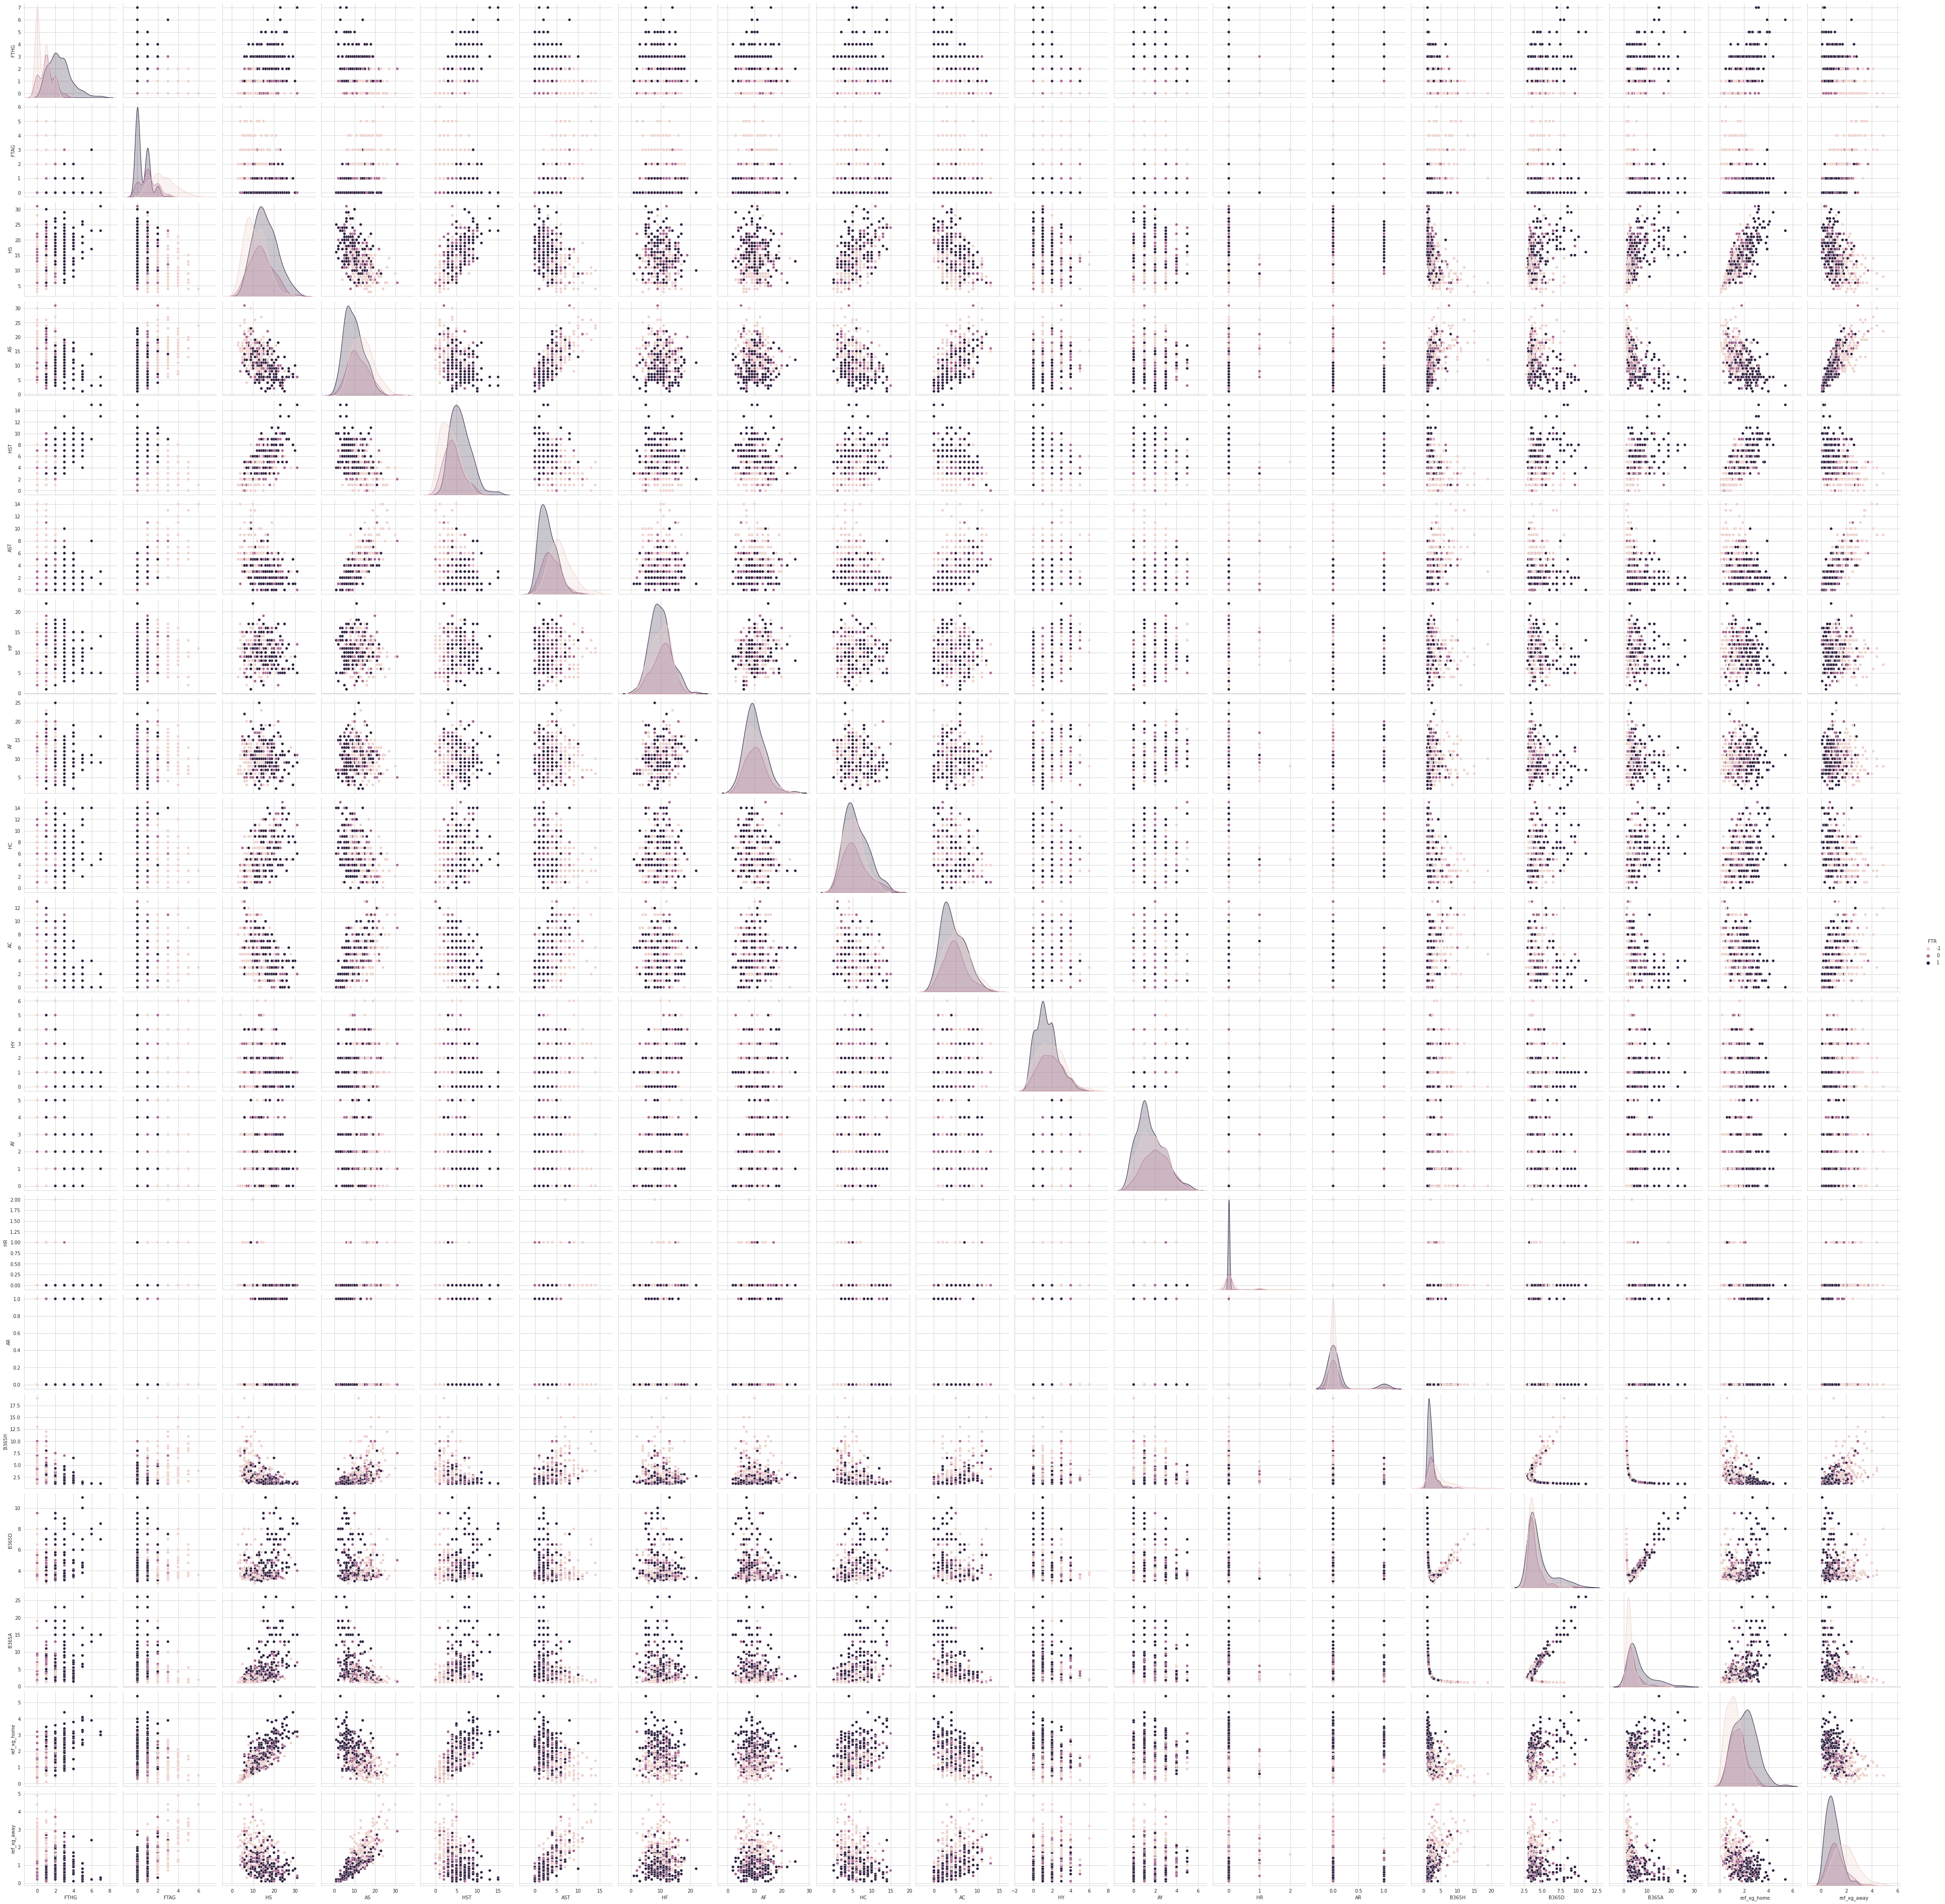

In [ ]:
import seaborn as sns
import pandas as pd


df3 = df2.copy()
#df3.pop('Date','Time','HomeTeam','AwayTeam')
df3.pop('Date')
df3.pop('Time')
df3.pop('HomeTeam')
df3.pop('AwayTeam')
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df3, hue="FTR", height=3);
plt.show()

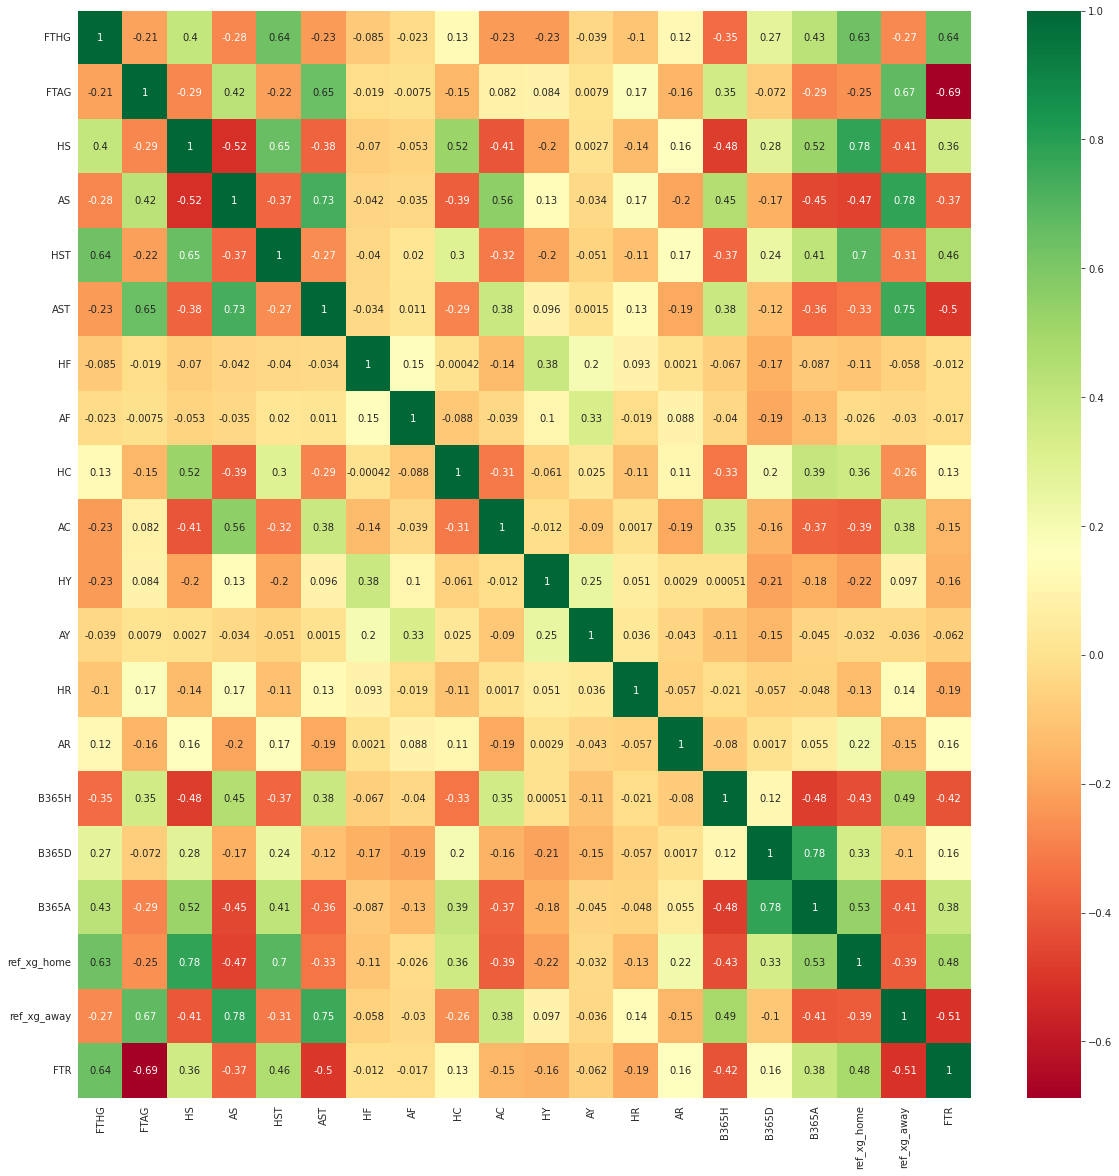

In [ ]:
corrmat = df3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df3[top_corr_features].corr(),annot=True,cmap="RdYlGn")